<a href="https://colab.research.google.com/github/AgdaBeatriz4/HumanActivityRecognition/blob/main/Segmentacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# algoritmo janela deslizante
# rever conversão do timestamp
# moving average 
# https://towardsdatascience.com/moving-averages-in-python-16170e20f6c
# correlação de pearson

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Experimento para Segmentação de Séries Temporais

*   Segmentação usando janela deslizante (sliding window);
*   Há um ajuste de precisão no recorte da janela baseado em medida de similaridade com a janela subsequente;
*   O algoritmo de similaridade utilizado é a correlação de Pearson, cuja função multivariável precisa ser carregada na inicialização do ambiente;
*   O procedimento de segmentação propriamente dito tem 3 etapas: 
> 1.   Leitura dos arquivos de dados a partir do formato obtido do app SensorBox, e ajuste de timestamp;
> 2.   Aplicação de filtro baixa baixa com base em algoritmo de médias móveis (moving average filter);
> 3.   Segmentação do sinal filtrado, aplicando-se sliding window com ajuste de tamanho de janela baseado no coeficiente de Pearson.

In [ ]:
### ESSAS FUNCOES SAO NECESSARIAS PRA SE IMPLEMENTAR O CALCULO 
### DE CORRELAÇÃO MULTIDIMENSIONAL
import numpy as np
import pandas as pd
from datetime import datetime
import math
import json
import os
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

def mean2(x):
    y = np.sum(x) / np.size(x);
    return y

def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / math.sqrt((a*a).sum() * (b*b).sum());
    return r

In [ ]:
dir = '/content/drive/MyDrive/Colab Notebooks'

In [ ]:
#cria um id para as amostras encontradas, que na pratica eh um contador
id = 1380

In [ ]:
#cria dataframe para guardar amostras segmentadas
dfseg = pd.DataFrame(columns = ['x', 'y', 'z', 'label', 'id'])

In [ ]:
atividade = input(str("Atividade: "))

Atividade: pintura


In [ ]:
num = input("numero: ")

numero: 20


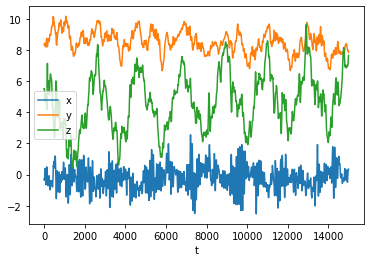

In [ ]:
#PASSO 1 - LEITURA DE ARQUIVO E ADEQUACAO DE TIMESTAMPS
#Neste primeiro passo, basicamente fazemos a obtenção dos dados dos arquivos
#capturados no smartphone (app SensorBox). É importante verificar o caminho
#onde o arquivo se encontra salvo, de acordo com o GDrive de quem executa.


#le arquivo de dados (no meu caso, separador eh ponto-e-virgula)
df = pd.read_csv(f"{dir}/dados-sensor/{atividade}-{num}/ACG.csv", sep=';')
# df = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/dados-sensor/ENDLESS_03_02_2023_03_40_54/ACG.csv", sep=';')

#le arquivo json de metainformacao para decodificar timestamp
with open(f"{dir}/dados-sensor/{atividade}-{num}/extra.json", encoding='utf-8') as meu_json:
    dados = json.load(meu_json)

# with open(f"/content/drive/MyDrive/Colab Notebooks/dados-sensor/ENDLESS_03_02_2023_03_40_54/extra.json", encoding='utf-8') as meu_json:
#     dados = json.load(meu_json)

#corrige timestamp do dataset para representar offset em milisegundos e inverte linha do tempo
df["t"] = (((dados["nanos"] - df.t) // 1000000) + dados["millis"]) #aplica correcoes de metadados
df["t"] = df.t - df.t.min() #puxa tempo inicial para zero, subtraindo valor minimo como offset
df = df.loc[::-1].reset_index(drop=True) #inverte ordem dos dados e corrige indices do dataframe

#plota os primeiros 3 mil pontos do dataframe ajustado (usamos t no eixo x pra representar o tempo em ms)
df.head(3000).plot(x = 't', y=['x', 'y', 'z'])

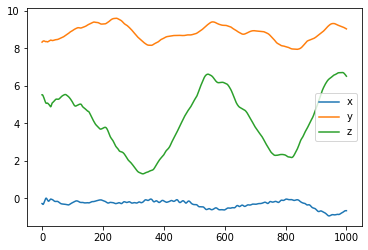

In [ ]:
#PASSO 2 - ELIMINACAO DE FREQUENCIAS ALTAS DO SINAL
#Sinais de acelerômetros tipicamente necessitam de um filtro
#passa-baixa pra produzir informação efetiva. Como nossa
#amostragem é aproximadamente 200 Hz (i.e., 200 amostras por
#segundo) e as atividades envolvem movimentos com frequencias
#muito menores, é interessante reduzir. Aqui utilizamos um
#filtro de medias moveis (do inglês, moving average filter ou MAF)

#cria uma copia do dataset de dados original
dfmaf = df.copy()

#define o tamanho da janela - quanto maior a janela do MAF, 
#mais baixa a frequencia
wsize = 100

#aplica o filtro em cada uma das componentes do sinal (x, y, z)
dfmaf.x = dfmaf.x.rolling(wsize, min_periods=1).mean()
dfmaf.y = dfmaf.y.rolling(wsize, min_periods=1).mean()
dfmaf.z = dfmaf.z.rolling(wsize, min_periods=1).mean()

#mostra gráfico pra gente ver como ficou (note que o eixo x agora e nro de amostras)
dfmaf.loc[0:1000].plot(y=['x', 'y', 'z'])
# dfmaf.plot(y=['x', 'y', 'z'])

Amostra 1380 [350-770] - cp = 0.997194
Amostra 1381 [770-1197] - cp = 0.997025
Amostra 1382 [1197-1615] - cp = 0.992784
Amostra 1383 [1615-2021] - cp = 0.997712
Amostra 1384 [2021-2429] - cp = 0.997638
Amostra 1385 [2429-2834] - cp = 0.993762
Amostra 1386 [2834-3263] - cp = 0.995050
Amostra 1387 [3263-3711] - cp = 0.997116
Amostra 1388 [3711-4105] - cp = 0.996013
Amostra 1389 [4105-4538] - cp = 0.997181
Amostra 1390 [4538-4981] - cp = 0.991563
Amostra 1391 [4981-5407] - cp = 0.994968
Amostra 1392 [5407-5856] - cp = 0.992720
Amostra 1393 [5856-6294] - cp = 0.996254
Amostra 1394 [6294-6721] - cp = 0.992509
Amostra 1395 [6721-7144] - cp = 0.998159
Amostra 1396 [7144-7570] - cp = 0.997898
Amostra 1397 [7570-8008] - cp = 0.996233
Amostra 1398 [end]


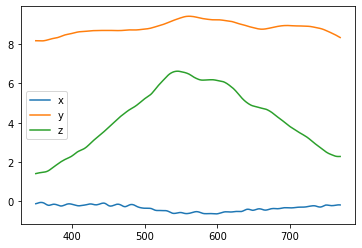

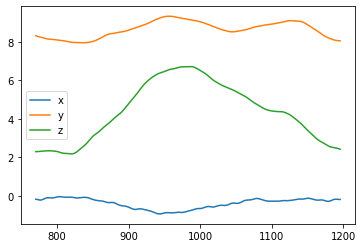

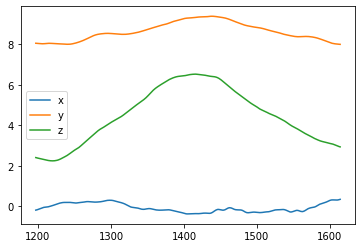

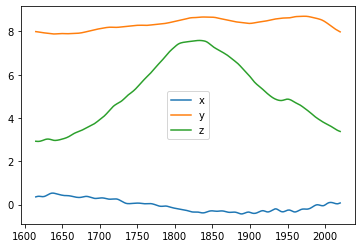

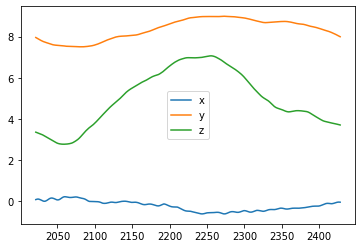

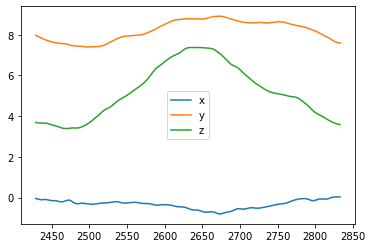

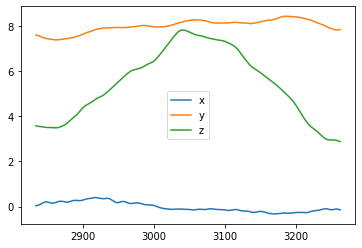

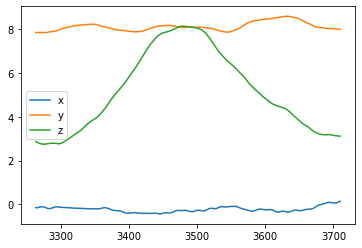

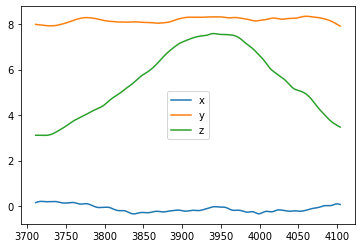

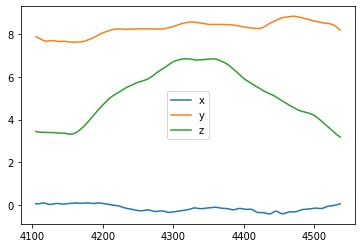

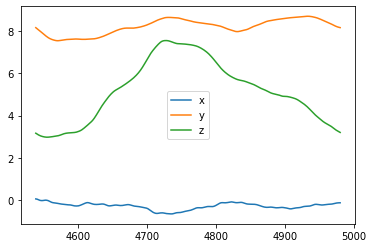

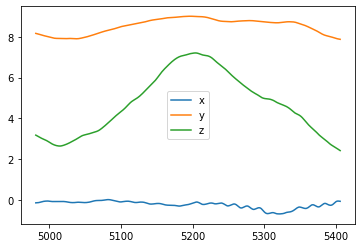

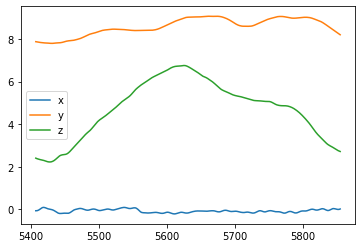

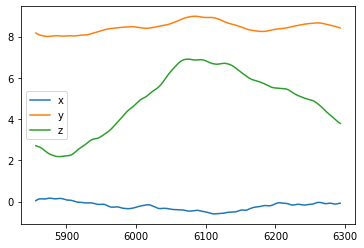

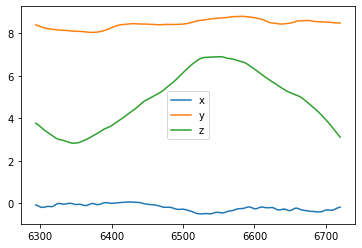

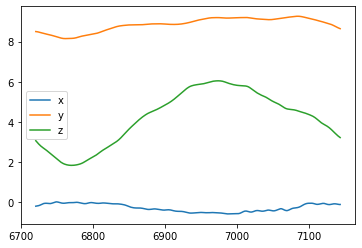

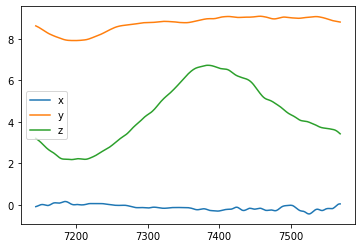

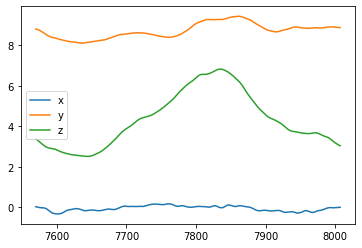

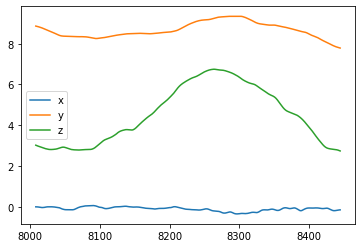

In [ ]:
#PASSO 3 - SEGMENTACAO BASEADA EM CORRELACAO DAS JANELAS
#Este algoritmo se baseia na ideia de janela deslizante
#(slidding window), mas utiliza a medida de similaridade
#entre janelas subsequentes para encontrar o ponto
#otimo de segmentacao. Utiliza correlacao de person
#multivariavel como medida de similaridade entre as 
#janelas.
#O algoritmo funciona bem para series de dados de uma mesma atividade
#repetida diversas vezes, em sequencia. Para series temporais com
#atividades distintas intercaladas, ou períodos de repouso, é
#necessário utilizar outro algoritmo.

#define o iterador de inicio da busca e janela inicial
# - precisa ser escolhido de forma a descartar dados iniciais nao desejados
i = 350

#define os tamanhos minimo e maximo da janela, em numero de amostras
# - precisam ser escolhidos com base em um conhecimento previo da duracao da atividade
wsizemin = 300
wsizemax = 450

# #cria um id para as amostras encontradas, que na pratica eh um contador
# id = 0

# #cria dataframe para guardar amostras segmentadas
# dfseg = pd.DataFrame(columns = ['id', 'x', 'y', 'z'])

#procura por janelas ate o limite do dataset
while (i + 2*wsize) <= len(dfmaf.index):

  #cria dataframe para guardar resultados de busca
  cpearson = pd.DataFrame(columns = ['wsize', 'coef'])

  #executa loop de busca por um coeficiente de Pearson maximo
  for wsize in range(wsizemin,wsizemax):
    #testa se nao chegou ao limite do vetor
    if (i + 2*wsize) >= len(dfmaf.index):
      #fim do conjunto de dados, precisa parar a busca
      break

    #obtem as duas janelas para comparacao
    a = dfmaf.iloc[i:i + wsize, 1:4].copy()
    b = dfmaf.iloc[i + wsize:i + 2*wsize, 1:4].copy()

    #calcula a correlacao entre os dois conjuntos de dados
    cpearson = cpearson.append({'wsize' : wsize, 'coef' : corr2(a.to_numpy(), b.to_numpy())}, ignore_index = True)

  #cpearson.plot(x = 'wsize', y= 'coef')
  bestsize = cpearson[cpearson.coef == cpearson.coef.max()]

  #redefine wsize com o valor encontrado em bestsize
  wsize = int(bestsize.iloc[0]['wsize'])

  #cria os subdatasets a and b como sendo as duas janelas encontradas neste ciclo
  a = dfmaf.iloc[i:i + wsize, 1:4].copy()
  b = dfmaf.iloc[i + wsize:i + 2*wsize, 1:4].copy()

  #eh interessante dar uma olhada em a pra ver se esta tudo indo bem...
  a.plot()
  #gera log
  print("Amostra %d [%d-%d] - cp = %f" % (id, i, i+ wsize, bestsize.iloc[0]['coef']))

  #adiciona uma coluna em a para guardar o id da amostra
  a['id'] = id

  #ajusta valor de i para a próxima interacao igualando ao inicio de b
  dfseg = dfseg.append(a)
  i += wsize

  #incrementa id de amostras para próxima iteracao
  id += 1

#quando a busca por amostras finaliza, temos a ultima amostra guardada em b,
#que pode ser coletada com o código abaixo (o mesmo usado para a no loop)
b.plot()
b['id'] = id 
dfseg = dfseg.append(b)
# dfseg.append(b)
print("Amostra %d [end]" % (id))

#entretanto, eh importante avaliar se coletar b eh uma boa estrategia, jah
#que a leitura da amostra pode ter sido comprometida no momento de desligar
#a captura.

In [ ]:
teste = dfseg[dfseg["id"] == dfseg["id"].unique()[len(dfseg["id"].unique()) - 1]]
teste["id"] = (dfseg["id"].unique()[len(dfseg["id"].unique()) - 1]) + 1
dfseg = pd.concat([dfseg, teste])

<ipython-input-337-a65f7c13f034>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste["id"] = (dfseg["id"].unique()[len(dfseg["id"].unique()) - 1]) + 1


In [ ]:
dfseg.loc[dfseg.label.isna(), "label"] = atividade
dfseg = dfseg.reset_index(drop = True)

In [ ]:
dfseg

,x,y,z,label,id
0,-0.223475,6.856012,4.896885,pintura,1200
1,-0.212797,6.869515,4.830996,pintura,1200
2,-0.207075,6.883330,4.766185,pintura,1200
3,-0.205399,6.897049,4.701566,pintura,1200
4,-0.206332,6.909858,4.636228,pintura,1200
...,...,...,...,...,...
72368,-0.161896,7.825209,2.790873,pintura,1399
72369,-0.156030,7.814818,2.781129,pintura,1399
72370,-0.151218,7.805145,2.769421,pintura,1399
72371,-0.148201,7.795257,2.756157,pintura,1399


In [ ]:
dfNew = pd.concat([dfNew, dfseg])

In [ ]:
dfNew = dfNew.reset_index(drop = True)

In [ ]:
dfseg.to_csv(f"{dir}/dados-segmentados/Dados-segmentados-{atividade}-02.csv", index = False)

In [ ]:
sheets_dir = '/content/drive/MyDrive/Colab Notebooks/dados-segmentados'
df_list = [pd.read_csv(f'{sheets_dir}/{sheet}') for sheet in os.listdir(sheets_dir)]

df_complete = pd.concat(df_list).to_csv(f"{dir}/dados-final-2.csv", index = False)

In [ ]:
df_complete

In [ ]:
dfseg = dfseg.drop(dfseg.loc[dfseg["id"] == dfseg["id"].unique()[len(dfseg["id"].unique()) - 1]].index)

# Levantamento
- 1: i = 800 min = 350 max = 400
- 2: i = 3300 min = 300 max = 450
- 3: i = 550 min = 300 max = 400
- 4: i = 625 min = 350 max = 450
- 5: i = 550 min = 300 max = 400 
- 6: i = 450 min = 300 max = 400
- 7: i = 400 min = 300 max = 400 
- 8: i = 450 min = 300 max = 400 
- 9: i = 450 min = 350 max = 450  
- 10: i = 400 min = 300 max = 400 

&nbsp;

- 11: i = 300 min = 350 max = 450
- 12: i = 300 min = 300 max = 450
- 13: i = 300 min = 300 max = 450
- 14: i = 300 min = 300 max = 450 
- 15: i = 300 min = 300 max = 450 
- 16: i = 200 min = 400 max = 500
- 17: i = 200 min = 350 max = 500 
- 18: i = 200 min = 300 max = 450 
- 19: i = 300 min = 300 max = 400  
- 20: i = 300 min = 300 max = 450 

&nbsp;

- 21: i = 850 min = 350 max = 450
- 22: i = 550 min = 350 max = 450 
- 23: i = 350 min = 250 max = 450 (dropar a ultima janela)
- 24: i = 400 min = 250 max = 350
- 25: i = 350 min = 250 max = 450
- 26: i = 350 min = 250 max = 450 
- 27: i = 350 min = 250 max = 450  
- 28: i = 250 min = 250 max = 450  
- 29: i = 350 min = 250 max = 450  
- 30: i = 350 min = 250 max = 450

# Martelada
- 1: i = 300 min = 200 max = 300
- 2: i = 250 min = 200 max = 300
- 3: i = 300 min = 200 max = 300
- 4: i = 350 min = 200 max = 300
- 5: i = 350 min = 200 max = 300
- 6: i = 350 min = 225 max = 300
- 7: i = 550 min = 200 max = 250
- 8: i = 550 min = 200 max = 250
- 9: i = 550 min = 200 max = 250
- 10: i = 500 min = 200 max = 250

&nbsp;

- 11: i = 400 min = 180 max = 240
- 12: i = 400 min = 180 max = 240
- 13: i = 200 min = 200 max = 250
- 14: i = 250 min = 220 max = 250 (adicionar uma janela igual a ultima)
- 15: i = 260 min = 240 max = 260
- 16: i = 260 min = 240 max = 260
- 17: i = 260 min = 230 max = 240
- 18: i = 260 min = 230 max = 240
- 19: i = 260 min = 230 max = 260
- 20: i = 260 min = 230 max = 280

&nbsp;

- 21: i = 300 min = 100 max = 250
- 22: i = 200 min = 10 max = 300
- 23: i = 150 min = 90 max = 350
- 24: i = 250 min = 250 max = 400 
- 25: i = 250 min = 150 max = 300 
- 26: i = 200 min = 50 max = 300
- 27: i = 100 min = 250 max = 300 
- 28: i = 150 min = 150 max = 450 
- 29: i = 250 min = 150 max = 450  
- 30: i = 250 min = 200 max = 450

# Pintura
- 1: i = 180 min = 250 max = 350 (dropar a ultima janela)
- 2: i = 250 min = 250 max = 350 (dropar a ultima janela) 
- 3: i = 250 min = 250 max = 350  
- 4: i = 250 min = 250 max = 350 (dropar a ultima janela) 
- 5: i = 250 min = 250 max = 350 (dropar a ultima janela) 
- 6: i = 250 min = 250 max = 350 
- 7: i = 250 min = 250 max = 350 (dropar a ultima janela)
- 8: i = 250 min = 250 max = 350
- 9: i = 350 min = 250 max = 350 
- 10: i = 350 min = 250 max = 350 

&nbsp;

- 11: i = 300 min = 350 max = 450
- 12: i = 300 min = 300 max = 450
- 13: i = 500 min = 300 max = 450
- 14: i = 200 min = 300 max = 450
- 15: i = 200 min = 300 max = 400 
- 16: i = 200 min = 300 max = 450
- 17: i = 200 min = 300 max = 450 
- 18: i = 250 min = 300 max = 450 
- 19: i = 300 min = 300 max = 450  
- 20: i = 350 min = 300 max = 450 

&nbsp;

- 21: i = 350 min = 300 max = 450
- 22: i = 250 min = 300 max = 450
- 23: i = 250 min = 300 max = 450
- 24: i = 250 min = 300 max = 450
- 25: i = 350 min = 300 max = 450 
- 26: i = 250 min = 300 max = 450
- 27: i = 250 min = 300 max = 450 
- 28: i = 200 min = 300 max = 450 
- 29: i = 300 min = 300 max = 450  
- 30: i = 200 min = 300 max = 450